# Множественная линейная регрессия на чистых данных

### Задания для выполнения

1) Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).

2) Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк.

3) Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.

4) Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.

5) Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

6) Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

### Методические указания

1) Отчет по лабораторной работе сдается в виде файла интерактивного ноутбука Jupyter notebook и должен включать весь программный код, реализующий задания лабораторной работы, подробные пояснения, обоснования и выводы там, где это требуется в виде текстовых ячеек.

2) Для сведения статистических данных можно воспользоваться средствами библиотек sklearn, numpy и pandas, либо табличным редактором Microsoft Excel. В любом случае, к отчету по лабораторной работе следует приложить как исходные данные без обработки, так и итоговый датасет, использующийся при обучении.

3) Для диагностики обучения регрессионных моделей рекомендуется строить кривые обучения. Используйте пример из документации sklearn как образец.

4) Для оценки качества построенной регрессии можно использовать целый ряд показателей. Одним из самых простых и универсальных является коэффициент детерминации (R2-score). Как использовать его читайте в официальной документации sklearn.

### Контрольные вопросы

1) Чем множественная регрессия отличается от парной?

2) Какую функцию ошибки использует модель линейной регрессии?

3) Какие метрики эффективности можно применять для оценки регрессионных моделей?

4) Какие еще регрессоры есть в библиотеке sklearn?

### Дополнительные задания

1) Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

2) Постройте сводную таблицу показателей точности всех построенных моделей по тестовой и обучающей выборке. Сделайте вывод, какие модели переобученнные, какие - недообученные.

3) Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

4) (*) Замерьте время обучения на разных объемах данных и количестве признаков. Сделайте вывод о зависимости скорости обучения от объема обучающей выборки.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

### №2

In [ ]:
X = pd.read_csv('1_x.csv', header=None)
Y = pd.read_csv('1_y.csv', header=None)

In [ ]:
X

,0,1,2,3,4,5,6
0,1.599865,0.340598,-0.603400,0.150586,-0.209677,0.955045,0.347682
1,1.472656,0.466832,-1.947130,0.625906,0.589354,0.753521,-2.138552
2,0.279378,-1.717121,0.251069,0.730013,0.301801,-0.206711,0.894811
3,0.450771,1.133196,-0.294028,-2.595338,0.313911,1.953527,0.359938
4,1.507042,0.932115,-0.789549,1.043712,-1.404000,-0.124354,-0.921117
...,...,...,...,...,...,...,...
120,1.018825,1.618920,-1.561572,1.057171,1.893181,-0.647510,1.220188
121,-1.244391,0.327816,-1.004231,-1.877654,1.307478,-1.839689,-0.176182
122,-1.968106,-0.054336,0.558046,-0.527741,-0.060449,0.531740,-0.374088
123,-0.970556,0.436830,0.877973,-0.970337,-0.282711,-1.464295,-0.976662


In [ ]:
Y

,0
0,101.507602
1,-65.305680
2,152.189336
3,-109.702103
4,-11.188624
...,...
120,293.947002
121,-146.511266
122,-143.163481
123,-188.233401


### №3

#### X

In [ ]:
X.info

<bound method DataFrame.info of             0         1         2         3         4         5         6
0    1.599865  0.340598 -0.603400  0.150586 -0.209677  0.955045  0.347682
1    1.472656  0.466832 -1.947130  0.625906  0.589354  0.753521 -2.138552
2    0.279378 -1.717121  0.251069  0.730013  0.301801 -0.206711  0.894811
3    0.450771  1.133196 -0.294028 -2.595338  0.313911  1.953527  0.359938
4    1.507042  0.932115 -0.789549  1.043712 -1.404000 -0.124354 -0.921117
..        ...       ...       ...       ...       ...       ...       ...
120  1.018825  1.618920 -1.561572  1.057171  1.893181 -0.647510  1.220188
121 -1.244391  0.327816 -1.004231 -1.877654  1.307478 -1.839689 -0.176182
122 -1.968106 -0.054336  0.558046 -0.527741 -0.060449  0.531740 -0.374088
123 -0.970556  0.436830  0.877973 -0.970337 -0.282711 -1.464295 -0.976662
124  1.755678  0.028767  1.631109 -1.209245  0.004220 -0.196236  0.093187

[125 rows x 7 columns]>

In [ ]:
X.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
dtype: object

In [ ]:
X.mean()

0   -0.046701
1    0.173034
2    0.049015
3   -0.005271
4   -0.095981
5   -0.107452
6   -0.056552
dtype: float64

#### Y

In [ ]:
Y.info

<bound method DataFrame.info of               0
0    101.507602
1    -65.305680
2    152.189336
3   -109.702103
4    -11.188624
..          ...
120  293.947002
121 -146.511266
122 -143.163481
123 -188.233401
124   76.381467

[125 rows x 1 columns]>

In [ ]:
Y.dtypes

0    float64
dtype: object

In [ ]:
Y.mean()

0   -10.905182
dtype: float64

### №4

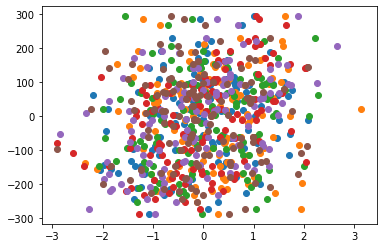

In [ ]:
plt.figure()
[plt.scatter(X[i], Y) for i in range(6)]
plt.show()

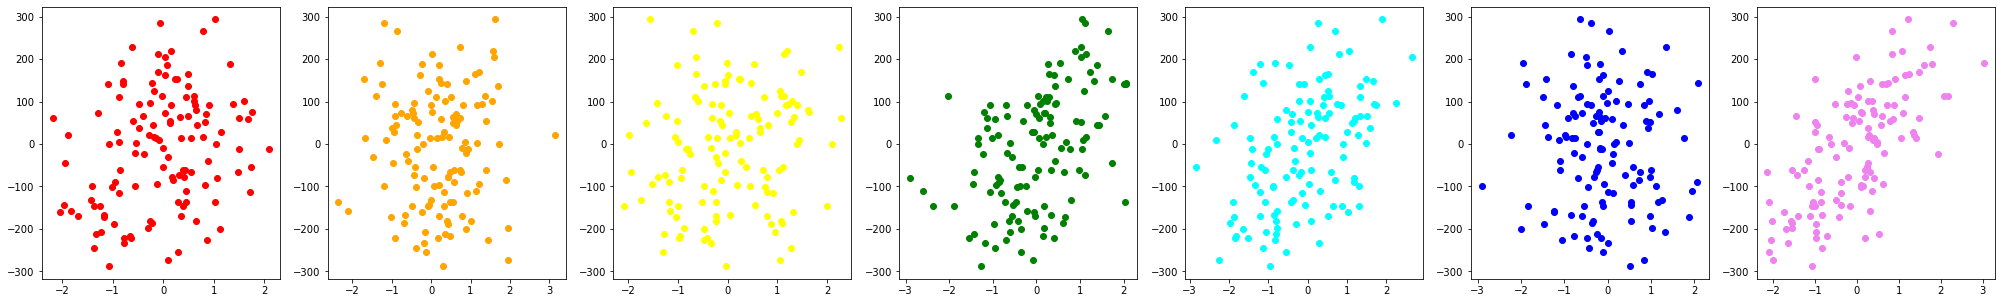

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, figsize=(35, 5))
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(X[0], Y, c="red")
ax2.scatter(X[1], Y, c="orange")
ax3.scatter(X[2], Y, c="yellow")
ax4.scatter(X[3], Y, c="green")
ax5.scatter(X[4], Y, c="cyan")
ax6.scatter(X[5], Y, c="blue")
ax7.scatter(X[6], Y, c="violet")
plt.show()

Мы видим что хорошая корреляция у нас наблюдается у четвертого признака из датасета X и датасета Y, а так же самая лучшая у 6 признака из датасета X и датасета Y. 

#### Y и X[6]

In [ ]:
x_r = np.array(X[6]).reshape(-1, 1)
y_r = np.array(Y).reshape(-1, 1)

In [ ]:
# Split the dataset: 80% vs 20% 
X_train, X_test, y_train, y_test = train_test_split(x_r, y_r, test_size=0.2, random_state=123)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(model.score(X_train, y_train)))

The R-squared value is: 0.4950 



Коэффициент корреляции 0.4950 показывает что корреляция между тренировочными признаками слабо-умеренная

In [ ]:
predicted = model.predict(X_test)
predicted

array([[ -89.2836673 ],
       [  44.324867  ],
       [  13.85708828],
       [  18.37350605],
       [ -62.60234267],
       [-134.05607557],
       [ 117.96753857],
       [-188.11166204],
       [  89.55456073],
       [   9.11132274],
       [  28.35649796],
       [-146.71855374],
       [ -31.18041767],
       [ -52.71658222],
       [  45.96814796],
       [  23.81572471],
       [  16.40486765],
       [-185.6862646 ],
       [ -95.87405424],
       [ -45.55803106],
       [  34.44324129],
       [-137.78404076],
       [   2.37452881],
       [ -28.33480634],
       [ -40.52211292]])

In [ ]:
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
print("The R-squared value is: {0:0.4f}".format(model.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: 0.3050
Mean Absolute Error: 85.379486
Root Mean Squared Error: 101.397970
Relative Absolute Error: 0.833975
Relative Squared Error: 0.694985


C:\Users\sanha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

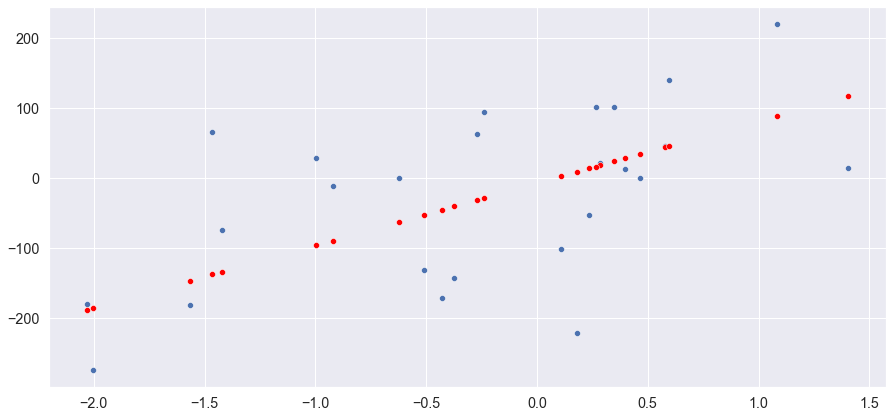

In [ ]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,7))

sns.scatterplot(X_test[:,0], y_test[:,0])
sns.scatterplot(X_test[:,0], model.predict(X_test)[:,0], color='red')

#### Y и X[5]

In [ ]:
x_r = np.array(X[5]).reshape(-1, 1)
y_r = np.array(Y).reshape(-1, 1)

In [ ]:
# Split the dataset: 80% vs 20% 
X_train, X_test, y_train, y_test = train_test_split(x_r, y_r, test_size=0.2, random_state=123)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(model.score(X_train, y_train)))

The R-squared value is: 0.0005 



In [ ]:
predicted = model.predict(X_test)
predicted

array([[ -7.32556043],
       [-11.58776611],
       [ -7.64156384],
       [-14.15832807],
       [ -8.45520321],
       [ -5.63833459],
       [ -1.19507281],
       [ -5.18055345],
       [ -5.84706047],
       [ -8.44993884],
       [ -9.58673134],
       [ -8.01533308],
       [ -7.51278683],
       [ -2.90183178],
       [-13.00162663],
       [ -3.83780993],
       [ -6.2926361 ],
       [ -4.23455974],
       [ -7.61472575],
       [ -0.83051944],
       [ -6.41761705],
       [ -7.81636465],
       [ -8.35186609],
       [ -8.48883704],
       [ -5.20559257]])

In [ ]:
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
print("The R-squared value is: {0:0.4f}".format(model.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: -0.0399
Mean Absolute Error: 100.154223
Root Mean Squared Error: 124.034792
Relative Absolute Error: 0.978292
Relative Squared Error: 1.039930


C:\Users\sanha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

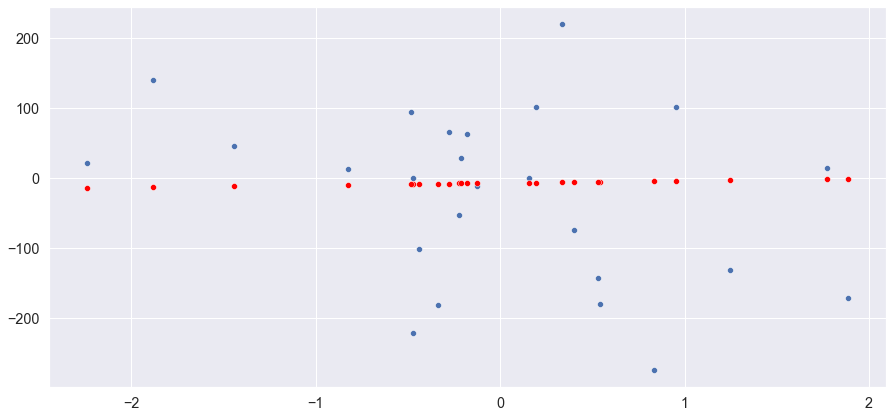

In [ ]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,7))

sns.scatterplot(X_test[:,0], y_test[:,0])
sns.scatterplot(X_test[:,0], model.predict(X_test)[:,0], color='red')

#### Y и X[4]

In [ ]:
x_r = np.array(X[4]).reshape(-1, 1)
y_r = np.array(Y).reshape(-1, 1)

In [ ]:
# Split the dataset: 80% vs 20% 
X_train, X_test, y_train, y_test = train_test_split(x_r, y_r, test_size=0.2, random_state=123)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(model.score(X_train, y_train)))

The R-squared value is: 0.1693 



In [ ]:
predicted = model.predict(X_test)
predicted

array([[ -81.82169257],
       [-106.86563881],
       [-159.80822629],
       [  63.75900596],
       [  42.77183516],
       [ -17.18555022],
       [ -85.57589347],
       [ -49.66240397],
       [  51.31822938],
       [ -88.15265858],
       [   6.5027629 ],
       [  -1.43543967],
       [   8.1847679 ],
       [ -25.73085609],
       [ -16.82632439],
       [ -17.02207703],
       [  -1.87038182],
       [-128.27760719],
       [  48.87279053],
       [-106.7948718 ],
       [ -48.13874753],
       [  66.59142763],
       [ -52.81118933],
       [  85.51114606],
       [  -8.925508  ]])

In [ ]:
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
print("The R-squared value is: {0:0.4f}".format(model.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: 0.2850
Mean Absolute Error: 88.005585
Root Mean Squared Error: 102.850745
Relative Absolute Error: 0.859626
Relative Squared Error: 0.715042


C:\Users\sanha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

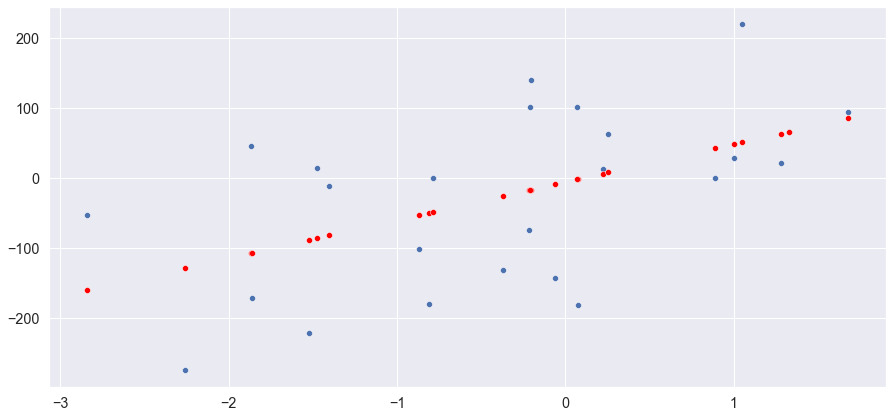

In [ ]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,7))

sns.scatterplot(X_test[:,0], y_test[:,0])
sns.scatterplot(X_test[:,0], model.predict(X_test)[:,0], color='red')

#### Y и X[3]

In [ ]:
x_r = np.array(X[3]).reshape(-1, 1)
y_r = np.array(Y).reshape(-1, 1)

In [ ]:
# Split the dataset: 80% vs 20% 
X_train, X_test, y_train, y_test = train_test_split(x_r, y_r, test_size=0.2, random_state=123)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(model.score(X_train, y_train)))

The R-squared value is: 0.2292 



In [ ]:
predicted = model.predict(X_test)
predicted

array([[  62.89417552],
       [  88.30683676],
       [ -30.22953338],
       [ -62.05186085],
       [   5.16670946],
       [  67.69632322],
       [  -1.28193034],
       [ -31.57703336],
       [  53.24882285],
       [-104.44086258],
       [ -70.48428383],
       [ -44.78964839],
       [  15.30708827],
       [  47.35390972],
       [ 128.21627666],
       [   4.96349631],
       [  10.26915057],
       [  -9.27349309],
       [ -11.37856492],
       [  37.96425419],
       [ -91.6100735 ],
       [  97.38599478],
       [ -33.68718145],
       [   1.11391536],
       [ -39.0347132 ]])

In [ ]:
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
print("The R-squared value is: {0:0.4f}".format(model.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: 0.1191
Mean Absolute Error: 94.740142
Root Mean Squared Error: 114.157951
Relative Absolute Error: 0.925408
Relative Squared Error: 0.880905


C:\Users\sanha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

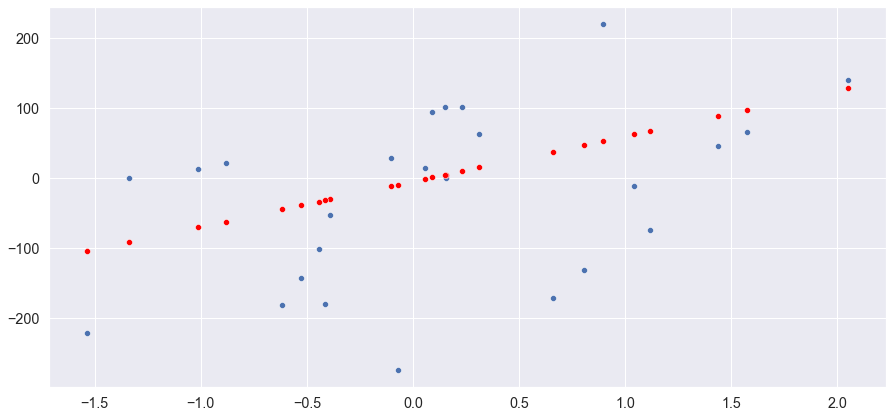

In [ ]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,7))

sns.scatterplot(X_test[:,0], y_test[:,0])
sns.scatterplot(X_test[:,0], model.predict(X_test)[:,0], color='red')

#### Y и X[2]

In [ ]:
x_r = np.array(X[2]).reshape(-1, 1)
y_r = np.array(Y).reshape(-1, 1)

In [ ]:
# Split the dataset: 80% vs 20% 
X_train, X_test, y_train, y_test = train_test_split(x_r, y_r, test_size=0.2, random_state=123)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(model.score(X_train, y_train)))

The R-squared value is: 0.0244 



In [ ]:
predicted = model.predict(X_test)
predicted

array([[-24.68092028],
       [ 10.81439164],
       [ 17.51159766],
       [ -3.40359854],
       [ 23.76709061],
       [-35.11289791],
       [-11.98874963],
       [ 16.95325106],
       [ 19.59386641],
       [-16.23021459],
       [ -6.06981317],
       [-12.48989648],
       [ 22.45036713],
       [-45.87589673],
       [ -8.18473085],
       [-20.53646679],
       [ 21.52338794],
       [ 16.48097693],
       [  7.27662858],
       [-30.00483141],
       [ 39.51444203],
       [-34.70556097],
       [  9.51389558],
       [ 20.46301194],
       [  5.32208314]])

In [ ]:
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
print("The R-squared value is: {0:0.4f}".format(model.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: 0.0017
Mean Absolute Error: 97.218454
Root Mean Squared Error: 121.529506
Relative Absolute Error: 0.949616
Relative Squared Error: 0.998344


C:\Users\sanha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

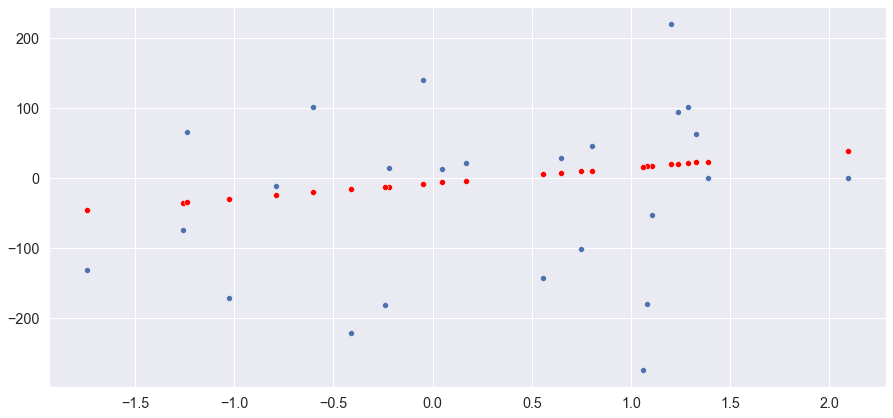

In [ ]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,7))

sns.scatterplot(X_test[:,0], y_test[:,0])
sns.scatterplot(X_test[:,0], model.predict(X_test)[:,0], color='red')

#### Y и X[1]

In [ ]:
x_r = np.array(X[1]).reshape(-1, 1)
y_r = np.array(Y).reshape(-1, 1)

In [ ]:
# Split the dataset: 80% vs 20% 
X_train, X_test, y_train, y_test = train_test_split(x_r, y_r, test_size=0.2, random_state=123)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(model.score(X_train, y_train)))

The R-squared value is: 0.0001 



In [ ]:
predicted = model.predict(X_test)
predicted

array([[ -6.2146445 ],
       [ -6.67408028],
       [ -7.55342116],
       [ -8.18963801],
       [ -7.94740642],
       [ -8.29466927],
       [-10.21511786],
       [ -6.09359444],
       [ -5.24895808],
       [ -9.03329864],
       [ -7.6930592 ],
       [ -7.04087404],
       [ -6.77352542],
       [ -7.6364765 ],
       [ -9.54879799],
       [ -7.11847272],
       [ -5.26196645],
       [ -4.66020157],
       [ -9.07196623],
       [ -9.21660566],
       [ -5.0120822 ],
       [ -9.03289824],
       [ -8.22819001],
       [ -9.05137438],
       [ -7.72192566]])

In [ ]:
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
print("The R-squared value is: {0:0.4f}".format(model.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: -0.0219
Mean Absolute Error: 99.238564
Root Mean Squared Error: 122.956862
Relative Absolute Error: 0.969348
Relative Squared Error: 1.021933


C:\Users\sanha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

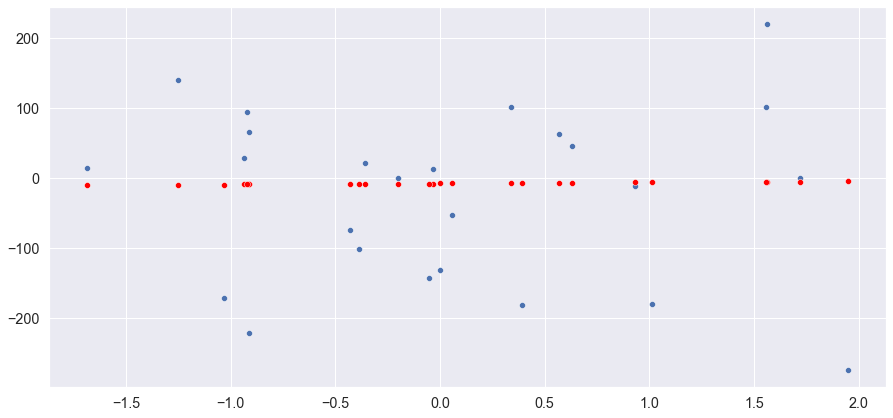

In [ ]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,7))

sns.scatterplot(X_test[:,0], y_test[:,0])
sns.scatterplot(X_test[:,0], model.predict(X_test)[:,0], color='red')

### Множественная (по всем столбцам X)

In [ ]:
# Split the dataset: 80% vs 20% 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [ ]:
lm_mn = linear_model.LinearRegression()
lm_mn.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(lm_mn.score(X_train, y_train)))

The R-squared value is: 0.9953 



In [ ]:
predicted = lm_mn.predict(X_test)
predicted

array([[ -23.23319802],
       [  50.45763197],
       [ -54.3583359 ],
       [  23.1159156 ],
       [ -10.05291448],
       [ -63.35925475],
       [  24.10754292],
       [-181.59140832],
       [ 250.57346062],
       [-222.24763695],
       [   3.85023991],
       [-186.66252953],
       [  64.61702523],
       [-120.25297205],
       [ 139.06889349],
       [  96.60647131],
       [ 105.86348876],
       [-266.31883782],
       [  43.75806327],
       [-178.81273485],
       [   4.4171741 ],
       [  62.30729812],
       [-106.20627699],
       [  88.96138657],
       [-157.62757426]])

In [ ]:
mae1 = np.mean(abs(predicted-y_test))
rmse1 = np.sqrt(np.mean((predicted-y_test)**2))
rae1 = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse1 = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
print("The R-squared value is: {0:0.4f}".format(lm_mn.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae1[0])) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse1[0])) 
print("Relative Absolute Error: {0:0.6f}".format(rae1[0])) 
print("Relative Squared Error: {0:0.6f}".format(rse1[0])) 

The R-squared value is: 0.9937
Mean Absolute Error: 7.396176
Root Mean Squared Error: 9.682292
Relative Absolute Error: 0.072245
Relative Squared Error: 0.006337


### Какие метрики эффективности можно применять для оценки регрессионных моделей?
Среднеквадратичная ошибка (RMSE) и средняя абсолютная ошибка (MAE). Эти показатели говорят нам, насколько точны наши прогнозы и какова величина отклонения от фактических значений.

Технически, RMSE — это корень среднего квадрата ошибок, а MAE — Средняя абсолютная ошибка (или среднее абсолютное отклонение) -  определяет среднее абсолютное расстояние между прогнозируемыми и целевыми значениями.

MSE
«Среднеквадратическая ошибка» -  находит среднеквадратичную ошибку между прогнозируемыми и фактическими значениями.

MAE более устойчив к выбросам, чем MSE.  в MSE путем возведения в квадрат ошибок, выбросы (которые обычно имеют более высокие ошибки, чем другие выборки) получают больше внимания и доминируют в окончательной ошибке и влияют на параметры модели.

Коэффициент детерминации (R2) – наиболее распространённая статистика для оценки качества модели

![image-6.png](attachment:image-6.png)
![image-4.png](attachment:image-4.png)
![image-5.png](attachment:image-5.png)

### Доп задания

In [ ]:
p2 = PolynomialFeatures(degree=2)
p3 = PolynomialFeatures(degree=3)
p10 = PolynomialFeatures(degree=10)
svt1=pd.DataFrame(columns=['Полином','Данные','R^2','MSE','MeaAE','MedAE', 'RMSE'])
svt2=pd.DataFrame(columns=['Полином','Данные','R^2','MSE','MeaAE','MedAE', 'RMSE'])
svt3=pd.DataFrame(columns=['Полином','Данные','R^2','MSE','MeaAE','MedAE', 'RMSE'])

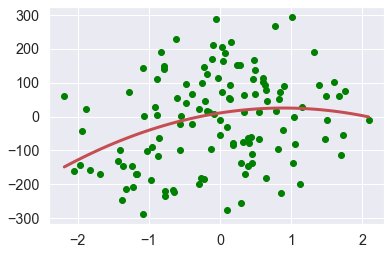

In [ ]:
x1_tr=p2.fit_transform(X_train[0].values.reshape(-1,1))
x1_te=p2.fit_transform(X_test[0].values.reshape(-1,1))
r = linear_model.LinearRegression().fit(x1_tr, y_train)
x=np.linspace(min(X_train[0]),max(X_train[0]))
y_pred = r.predict(p2.fit_transform(x.reshape(-1,1)))
plt.scatter(X[0].values, Y, color="green")
plt.plot(x, y_pred, color="r", linewidth=3)
plt.show()

In [ ]:
x1_tr=p2.fit_transform(X_train[0].values.reshape(-1,1))
x1_te=p2.fit_transform(X_test[0].values.reshape(-1,1))
y_pred1 = r.predict(x1_tr)
y_pred2 = r.predict(x1_te)
r2_tr = r2_score(y_train,y_pred1)
MSE_tr = mean_squared_error(y_train,y_pred1)
MeaAE_tr = mean_absolute_error(y_train,y_pred1)
MedAE_tr = median_absolute_error(y_train,y_pred1)
RMSE_tr = np.sqrt(MSE_tr)
r2_te = r2_score(y_test,y_pred2)
MSE_te = mean_squared_error(y_test,y_pred2)
MeaAE_te = mean_absolute_error(y_test,y_pred2)
MedAE_te = median_absolute_error(y_test,y_pred2)
RMSE_te = np.sqrt(MSE_te)
svt11 = pd.DataFrame([['2-й степени','Train',r2_tr, MSE_tr,MeaAE_tr,MedAE_tr, RMSE_tr]],columns = ['Полином','Данные','R^2','MSE','MeaAE','MedAE', 'RMSE'])
svt1 = pd.concat([svt1,svt11],ignore_index=True)
svt12 = pd.DataFrame([['2-й степени','Test',r2_te, MSE_te,MeaAE_te,MedAE_te, RMSE_te]],columns = ['Полином','Данные','R^2','MSE','MeaAE','MedAE', 'RMSE'])
svt1 = pd.concat([svt1,svt12],ignore_index=True)
svt1

,Полином,Данные,R^2,MSE,MeaAE,MedAE,RMSE
0,2-й степени,Train,0.080793,17506.757463,111.939088,98.179751,132.313104
1,2-й степени,Test,0.087449,13500.204332,88.240872,59.161774,116.190380
2,2-й степени,Train,0.080793,17506.757463,111.939088,98.179751,132.313104
3,2-й степени,Test,0.087449,13500.204332,88.240872,59.161774,116.190380
